In [2]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal,ogr,osr
import os
import pandas as pd

In [3]:
src1 = gdal.Open(r'F:\wenqu\Hyperspectral_site\simulation_clip\site1b\site1b_Q1.tif').ReadAsArray() 
src1.shape

(122, 19, 19)

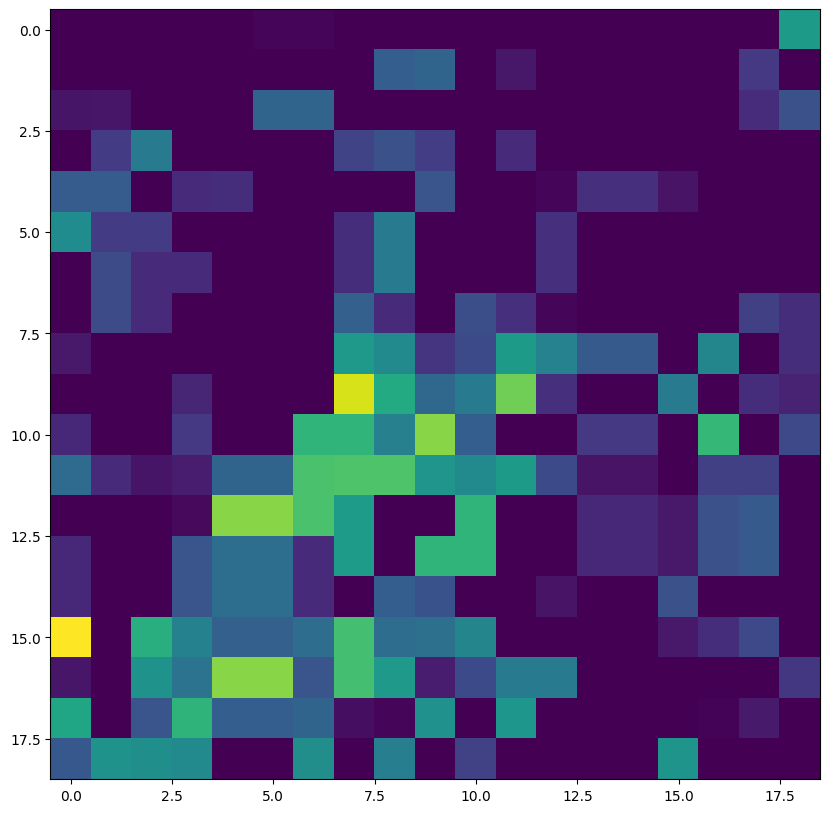

In [5]:
fig = plt.figure(figsize = (10,10))
plt.imshow(src1[121,:,:], interpolation='nearest')
plt.show()

In [3]:
src1_b0_std = np.std(src1[0,:,:])
src1_b0_std

0.020106755

In [4]:
band_std = np.std(src1, axis=(1,2))
band_std

array([0.02010676, 0.00957666, 0.00827534, 0.00521105, 0.0049274 ,
       0.00637387, 0.00479852, 0.00418239, 0.0057014 , 0.00679681,
       0.00563477, 0.00611625, 0.00595376, 0.00659649, 0.00721384,
       0.00673172, 0.00725387, 0.00736156, 0.007505  , 0.00757179,
       0.00788951, 0.00796321, 0.00839807, 0.00912791, 0.00993638,
       0.01077774, 0.01207027, 0.01308284, 0.01388561, 0.01456901,
       0.01531084, 0.01551817, 0.01588481, 0.01533329, 0.01491374,
       0.01469262, 0.01413819, 0.01367964, 0.01376675, 0.01367127,
       0.01368369, 0.01378629, 0.01346735, 0.01293275, 0.01291211,
       0.01308188, 0.0131544 , 0.01332732, 0.01328844, 0.01270533,
       0.0125134 , 0.01241023, 0.01177115, 0.01104561, 0.01048738,
       0.01037553, 0.0103719 , 0.01149029, 0.01362715, 0.0159339 ,
       0.0204096 , 0.02427199, 0.02755131, 0.02972867, 0.03297065,
       0.03490528, 0.03658747, 0.03803453, 0.03887855, 0.03908953,
       0.03908749, 0.03993152, 0.04097294, 0.03957321, 0.04003

In [5]:
path = 'F:/wenqu/Hyperspectral_site/simulation_clip/site1b'
hdr_files = []
for f in os.listdir(path):
    if f.endswith('.tif'):
        hdr_files.append(f.replace('.tif', ''))
        

# hdr_files

In [6]:
hdr_files[0]

'site1b_Q1'

In [7]:
file_band_mean = []
file_band_std = []
for i in range(len(hdr_files)):
    dst_hdr = gdal.Open('F:/wenqu/Hyperspectral_site/simulation_clip/site1b/'+ hdr_files[i]+'.tif').ReadAsArray() 
#     print(dst_hdr.shape)
    band_mean = np.mean(dst_hdr, axis=(1,2))
    file_band_mean.append(band_mean)
    band_std = np.std(dst_hdr, axis=(1,2))
    file_band_std.append(band_std)


#        

In [8]:
file_band_mean = np.array(file_band_mean)
file_band_std = np.array(file_band_std)
print(file_band_mean.shape)

(26, 122)


In [9]:
file_band_statistic = np.concatenate((file_band_mean, file_band_std), axis=1)

In [14]:
b_name_mean = []
b_name_std = []
for i in range(1, 123):
    b_mean = 'b' + str(i) + '_mean'
    b_name_mean.append(b_mean)
    b_std = 'b' + str(i) + '_std'
    b_name_std.append(b_std)


In [15]:
band_name = b_name_mean + b_name_std
band_name

['b1_mean',
 'b2_mean',
 'b3_mean',
 'b4_mean',
 'b5_mean',
 'b6_mean',
 'b7_mean',
 'b8_mean',
 'b9_mean',
 'b10_mean',
 'b11_mean',
 'b12_mean',
 'b13_mean',
 'b14_mean',
 'b15_mean',
 'b16_mean',
 'b17_mean',
 'b18_mean',
 'b19_mean',
 'b20_mean',
 'b21_mean',
 'b22_mean',
 'b23_mean',
 'b24_mean',
 'b25_mean',
 'b26_mean',
 'b27_mean',
 'b28_mean',
 'b29_mean',
 'b30_mean',
 'b31_mean',
 'b32_mean',
 'b33_mean',
 'b34_mean',
 'b35_mean',
 'b36_mean',
 'b37_mean',
 'b38_mean',
 'b39_mean',
 'b40_mean',
 'b41_mean',
 'b42_mean',
 'b43_mean',
 'b44_mean',
 'b45_mean',
 'b46_mean',
 'b47_mean',
 'b48_mean',
 'b49_mean',
 'b50_mean',
 'b51_mean',
 'b52_mean',
 'b53_mean',
 'b54_mean',
 'b55_mean',
 'b56_mean',
 'b57_mean',
 'b58_mean',
 'b59_mean',
 'b60_mean',
 'b61_mean',
 'b62_mean',
 'b63_mean',
 'b64_mean',
 'b65_mean',
 'b66_mean',
 'b67_mean',
 'b68_mean',
 'b69_mean',
 'b70_mean',
 'b71_mean',
 'b72_mean',
 'b73_mean',
 'b74_mean',
 'b75_mean',
 'b76_mean',
 'b77_mean',
 'b78_me

In [16]:
hdr_files

['site1b_Q1',
 'site1b_Q10',
 'site1b_Q11',
 'site1b_Q12',
 'site1b_Q14',
 'site1b_Q15',
 'site1b_Q17',
 'site1b_Q19',
 'site1b_Q2',
 'site1b_Q20',
 'site1b_Q21',
 'site1b_Q22',
 'site1b_Q23',
 'site1b_Q24',
 'site1b_Q26',
 'site1b_Q27',
 'site1b_Q28',
 'site1b_Q29',
 'site1b_Q3',
 'site1b_Q31',
 'site1b_Q32',
 'site1b_Q4',
 'site1b_Q5',
 'site1b_Q6',
 'site1b_Q8',
 'site1b_Q9']

In [17]:
df = pd.DataFrame(file_band_statistic, columns = band_name, index = hdr_files)

print(df)

             b1_mean   b2_mean   b3_mean   b4_mean   b5_mean   b6_mean  \
site1b_Q1   0.008066  0.005356  0.005069  0.003740  0.003234  0.004096   
site1b_Q10  0.009731  0.006944  0.006660  0.004985  0.005775  0.005698   
site1b_Q11  0.009178  0.006943  0.004953  0.004245  0.004165  0.004981   
site1b_Q12  0.015963  0.009181  0.009470  0.006101  0.006833  0.007718   
site1b_Q14  0.013563  0.009756  0.007837  0.006729  0.006789  0.006688   
site1b_Q15  0.017786  0.012587  0.014262  0.014220  0.013599  0.013348   
site1b_Q17  0.012683  0.011679  0.009746  0.009392  0.010329  0.011217   
site1b_Q19  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
site1b_Q2   0.007073  0.005461  0.006265  0.004865  0.004999  0.004671   
site1b_Q20  0.010889  0.008047  0.008364  0.007148  0.007000  0.009132   
site1b_Q21  0.009929  0.007659  0.007783  0.004877  0.004342  0.005454   
site1b_Q22  0.008476  0.007736  0.005443  0.005107  0.005158  0.006117   
site1b_Q23  0.019044  0.014451  0.0111

In [18]:
df.to_csv(r'F:\wenqu\csv_corrected\simulated_file_csv\site1b_update1\site1b_quadrant_simulation_band_statistic.csv')